In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## 1.1 Reading Data

In [916]:
bos = load_boston().data
tar = load_boston().target
X = pd.DataFrame(bos)
Y = pd.DataFrame(tar)
Z=X

In [886]:
X.shape

(506, 13)

In [887]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [888]:
Y.head(5)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 1.2 Implementing sklearns's SGDRegressor

In [889]:
scaler = preprocessing.StandardScaler().fit(X)
X_tr = scaler.transform(X)

In [890]:
clf = SGDRegressor()
clf.fit(X_tr, Y)
print(mean_squared_error(Y, clf.predict(X_tr)))
p=clf.predict(X_tr)

22.837369335966102


## 1.3 Implementing own SGD for Linear Regression

In [929]:
class SGD_LR:
    def __init__(self, w, b, scaler):
        self.w = w
        self.b = b
        self.scaler = scaler
        
    def predict_LR(self, x):
        x = self.scaler.transform(x)
        y = np.dot(x,self.w)+self.b
        return y

In [930]:
def LinearRegression_SGD(X,Y):
    scaler = preprocessing.StandardScaler().fit(X)
    X_train = scaler.transform(X)
    X_train=pd.DataFrame(X_train)
    w_now = np.ones((13,))
    b_now = 1
    learning_rate=0.1;
    N = float(len(Y))
    error=[]
    b_prev =0
    SGD_k=40 
    starting_x=0
    while int(b_prev*1000)!=int(b_now*1000):
        x=X_train[starting_x:starting_x+SGD_k]
        y=Y[starting_x:starting_x+SGD_k]
        w_next = -2*np.sum(np.transpose(np.transpose(x)*(y[0]-np.dot(x,w_now)-b_now)),axis=0)
        b_next = -2*np.sum((y[0]-np.dot(x,w_now)-b_now),axis=0)
        w_now = w_now  - (learning_rate*w_next/SGD_k)
        b_prev = b_now
        b_now = b_now  - (learning_rate*b_next/SGD_k)
        learning_rate = 100*learning_rate/101
        starting_x=(starting_x+SGD_k)%int(N)
    model = SGD_LR(w_now,b,scaler)
    return model

In [931]:
model=LinearRegression_SGD(X,Y)

In [933]:
y=model.predict_LR(X)

In [934]:
print(mean_squared_error(Y, y))

22.049639812752698


## 1.4 Predicted Cost(implemented own SGD) vs Actual Cost graph

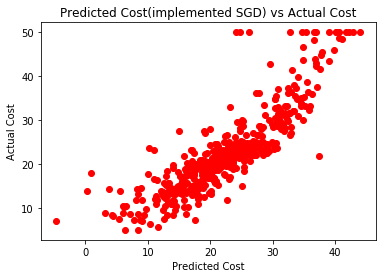

In [779]:
import matplotlib.pyplot as plot
plot.scatter(y, Y, color = 'red')
plot.title('Predicted Cost(implemented SGD) vs Actual Cost')
plot.xlabel('Predicted Cost')
plot.ylabel('Actual Cost')
plot.show()

## 1.5 Predicted Cost(sklearn's SGDRegresser) vs Actual Cost graph

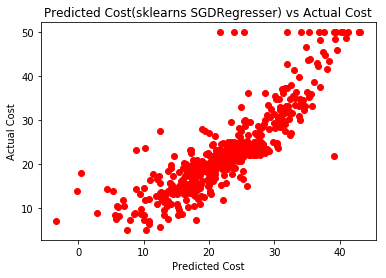

In [780]:
import matplotlib.pyplot as plot
plot.scatter(p, Y, color = 'red')
plot.title('Predicted Cost(sklearn''s SGDRegresser) vs Actual Cost')
plot.xlabel('Predicted Cost')
plot.ylabel('Actual Cost')
plot.show()

## 1.6 Conclusion

In [781]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["SGD", "b-intercept", "MSE"]
x.add_row(["sklearn's SGDRegresser", clf.intercept_, mean_squared_error(Y, p)])
x.add_row(["Implemented SGD", b, mean_squared_error(Y, y)])
print(x)

+------------------------+-------------------+--------------------+
|          SGD           |    b-intercept    |        MSE         |
+------------------------+-------------------+--------------------+
| sklearn's SGDRegresser |   [22.40467957]   | 22.886462687501666 |
|    Implemented SGD     | 22.38593580184268 | 22.049639812752698 |
+------------------------+-------------------+--------------------+


In [782]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["SGD", "Weight(w)"]
x.add_row(["sklearn's SGDRegresser",clf.coef_])
x.add_row(["Implemented SGD",np.array(w)])
print(x)

+------------------------+--------------------------------------------------------------------------+
|          SGD           |                                Weight(w)                                 |
+------------------------+--------------------------------------------------------------------------+
| sklearn's SGDRegresser | [-0.55909646  0.50573967 -0.17425154  0.78482746 -0.97485016  3.06303848 |
|                        |  -0.00807852 -1.9831831   0.86247802 -0.45484589 -1.87056832  0.86374818 |
|                        |                               -3.59176261]                               |
|    Implemented SGD     | [-0.86999025  1.03315906 -0.09334903  0.73508172 -1.66690393  2.52984497 |
|                        |   0.05787059 -2.95216413  1.97917718 -1.40372078 -1.95795741  0.90854843 |
|                        |                               -3.98537903]                               |
+------------------------+--------------------------------------------------------